In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
from sklearn.mixture import GaussianMixture
import os
from mpl_toolkits import mplot3d

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [8]:
dogdata_w_mat = io.loadmat(os.path.join('..','DATA','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('..','DATA','catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

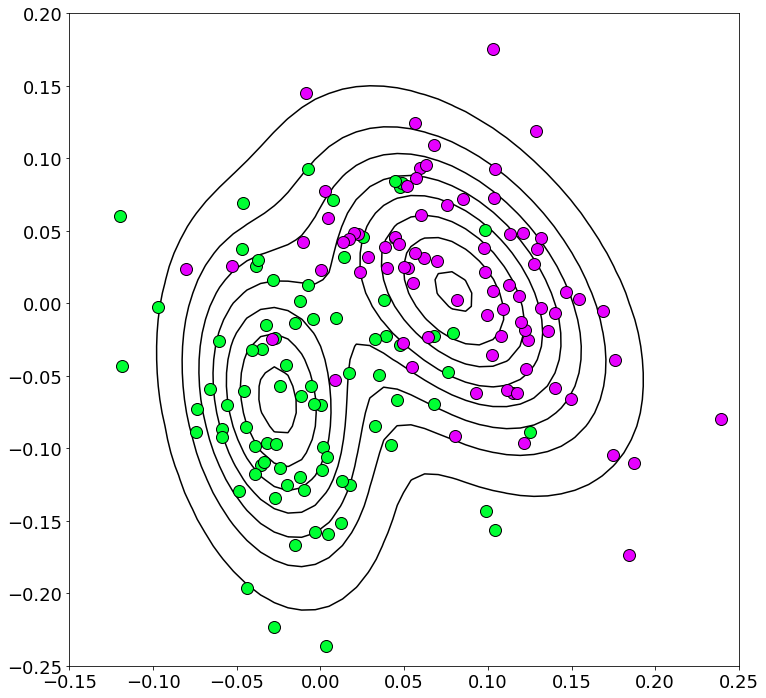

In [43]:
dogcat = v[:,(1,3)]
GMModel = GaussianMixture(n_components=2).fit(dogcat)
AIC = GMModel.aic(dogcat)

plt.plot(v[:80,1],v[:80,3],'ro',MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
plt.plot(v[80:,1],v[80:,3],'bo',MarkerFaceColor=(0.9,0,1),MarkerEdgeColor='k',ms=12)

x = np.linspace(-0.15, 0.25)
y = np.linspace(-0.25, 0.2)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = np.exp(GMModel.score_samples(XX))
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z,levels=np.arange(3,32,4),colors='k',linestyles='solid')

plt.show()

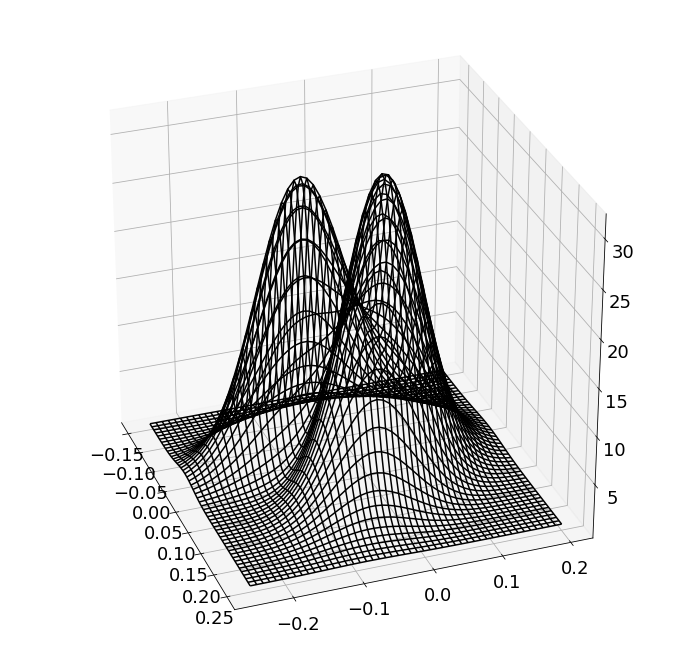

In [49]:
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.view_init(30, -20)
plt.show()

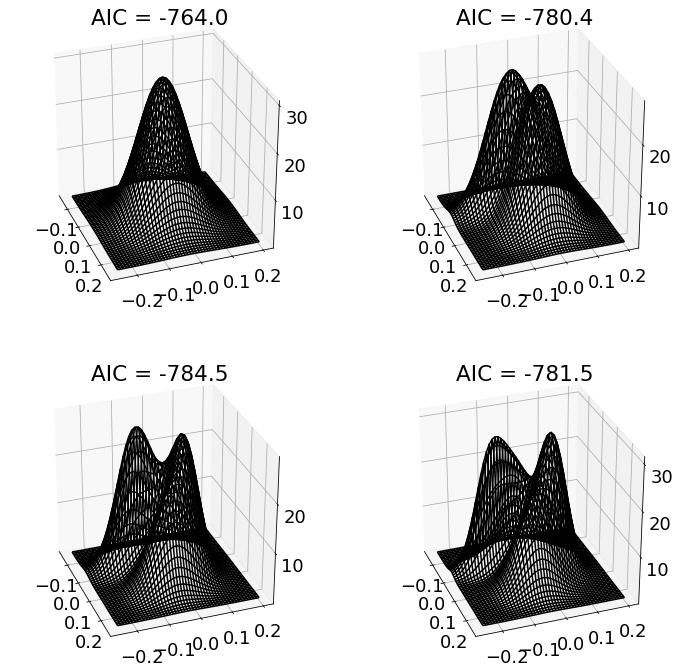

In [65]:
## AIC Scores
AIC = np.zeros(4)
GMModels = [GaussianMixture(k+1,covariance_type='diag',max_iter=500).fit(dogcat)
          for k in range(4)]

fig,axs = plt.subplots(2,2,subplot_kw={'projection': '3d'})
axs = axs.reshape(-1)

for j in range(len(axs)):
    Z = np.exp(GMModels[j].score_samples(XX))
    Z = Z.reshape(X.shape)
    AIC[j] = GMModels[j].aic(dogcat)
    axs[j].plot_wireframe(X, Y, Z, color='black')
    axs[j].view_init(30, -20)
    axs[j].set_title('AIC = {:.4}'.format(AIC[j]))
